In [72]:
import fiasco
import astropy.units as u
import astropy.constants as const
import numpy as np
import matplotlib.pyplot as plt


In [4]:
p = fiasco.io.Parser('chianti.ip')
t = p.parse()
t

Z,ion,ip
,,1 / cm
int64,int64,float64
1,1,109678.7737
2,1,198310.77227
2,2,438908.8863
3,1,43487.15
3,2,610079.0
3,3,987661.027
4,1,75192.64
...,...,...


In [6]:
p2 = fiasco.io.Parser('sun_photospheric_2009_asplund.abund')
t2 = p2.parse()
t2

Z,abundance,element
,,
int64,float64,str2
1,1.0,H
2,0.08511380382023759,He
3,1.1220184543019653e-11,Li
4,2.398832919019485e-11,Be
5,5.011872336272714e-10,B
6,0.0002691534803926914,C
7,6.760829753919819e-05,N
...,...,...


In [19]:
hr1099_factor = [3.8, 1.4, 1.0, 0.59, 0.45, 0.25, 0.95, 0.33]
hr1099_Z = [10, 7, 8, 6, 16, 26, 12, 28]
for i in range(len(hr1099_Z)):
    ind = np.where(t2['Z'] == hr1099_Z[i])
    print(t2['abundance'][ind], t2['abundance'][ind]*hr1099_factor[i])
    t2['abundance'][ind] *= hr1099_factor[i]
t2

[8.51138038e-05] [0.00032343]
[6.76082975e-05] [9.46516166e-05]
[0.00048978] [0.00048978]
[0.00026915] [0.0001588]
[1.31825674e-05] [5.93215532e-06]
[3.16227766e-05] [7.90569415e-06]
[3.98107171e-05] [3.78201812e-05]
[1.65958691e-06] [5.47663679e-07]


Z,abundance,element
,,
int64,float64,str2
1,1.0,H
2,0.08511380382023759,He
3,1.1220184543019653e-11,Li
4,2.398832919019485e-11,Be
5,5.011872336272714e-10,B
6,0.0001588005534316879,C
7,9.465161655487746e-05,N
...,...,...


0.07040189191714404 -0.9513058129864606


Text(0.5, 1.0, 'Inverse FIP effect in HR 1099 -- Figure 4 of Brinkman et al 2001')

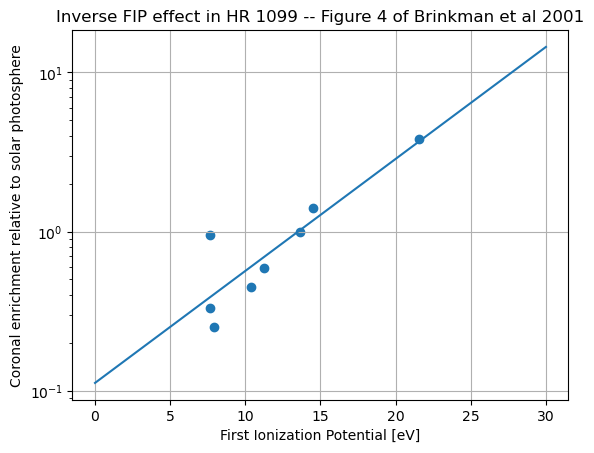

In [73]:
ind = np.where(t['ion'] == 1)
fip = (t['ip'][ind] * const.h * const.c).to(u.eV)
ind = [i-1 for i in hr1099_Z]

# fit a line
m,b = np.polyfit(fip[ind].value, np.log10(hr1099_factor), 1)
print(m,b)
x = np.linspace(0,30)


plt.scatter(fip[ind], hr1099_factor)
plt.plot(x, 10.0**(m*x+b))
plt.grid('-')
plt.yscale('log')
plt.xlabel('First Ionization Potential [eV]')
plt.ylabel('Coronal enrichment relative to solar photosphere')
plt.title('Inverse FIP effect in HR 1099 -- Figure 4 of Brinkman et al 2001')

In [92]:
factor = 10.0**(m*fip.value+b)
for i in range(len(fip)):
    print(t2['Z'][i], fip[i], factor[i])

1 13.598434842330867 eV 1.0140274859548108
2 24.587402140564866 eV 6.021349210794526
3 5.391719434894345 eV 0.2680905069330476
4 9.32269919847619 eV 0.5070255541274733
5 8.29802683115707 eV 0.42942860986265974
6 11.260296975066588 eV 0.6941293331578754
7 14.534097255011273 eV 1.180109023336391
8 13.618054882991387 eV 1.0172577682417203
9 17.42281749272625 eV 1.8849225106877647
10 21.564534438226993 eV 3.6887413982174113
11 5.139075593905029 eV 0.2573326139494211
12 7.646231981257861 eV 0.386369988089993
13 5.985755006111463 eV 0.29519069531170833
14 8.151683322378425 eV 0.4193610733911063
15 10.486686410364777 eV 0.6123176107061749
16 10.360008035299623 eV 0.5998716712131472
17 12.967631298326847 eV 0.9154612459080298
18 15.759606666004398 eV 1.4394623567613754
19 4.340663726085432 eV 0.2260919635006233
20 6.1131586887374505 eV 0.3013506442625991
21 6.5614917494818235 eV 0.32406760534426116
22 6.820370755810346 eV 0.3379568019681804
23 6.739781026828766 eV 0.3335704128083266
24 6.76651

In [74]:
temperature = np.logspace(4, 9, 101) * u.K
abundance_name = 'sun_photospheric_2009_asplund'
ioneq_name = 'chianti'
hdf5_dbase_root = fiasco.defaults['hdf5_dbase_root']
ion_kwargs = {
    'abundance': abundance_name,
    'ioneq_filename': ioneq_name,
    'hdf5_dbase_root': hdf5_dbase_root,
}
all_ions = [fiasco.Ion(i, temperature, **ion_kwargs) for i in fiasco.list_ions(hdf5_dbase_root)]
all_ions = fiasco.IonCollection(*all_ions)
density = [1e10]*u.cm**-3

rl = all_ions.radiative_loss(density)

/Users/reep/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/reep/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [106]:
for ion in all_ions:
    if ion.atomic_number == 1:
        continue
    elif ion.atomic_number in hr1099_Z:
        ind = hr1099_Z.index(ion.atomic_number)
        print(ion.atomic_number, hr1099_factor[ind])
        ion.abundance *= hr1099_factor[ind]
    else:
        ind = ion.atomic_number-1
        print(ion.atomic_number, factor[ind])
        ion.abundance *= factor[ind]


2 6.021349210794526
2 6.021349210794526
2 6.021349210794526
3 0.2680905069330476
3 0.2680905069330476
3 0.2680905069330476
3 0.2680905069330476
4 0.5070255541274733
4 0.5070255541274733
4 0.5070255541274733
4 0.5070255541274733
4 0.5070255541274733
5 0.42942860986265974
5 0.42942860986265974
5 0.42942860986265974
5 0.42942860986265974
5 0.42942860986265974
5 0.42942860986265974
6 0.59
6 0.59
6 0.59
6 0.59
6 0.59
6 0.59
6 0.59
7 1.4
7 1.4
7 1.4
7 1.4
7 1.4
7 1.4
7 1.4
7 1.4
8 1.0
8 1.0
8 1.0
8 1.0
8 1.0
8 1.0
8 1.0
8 1.0
8 1.0
9 1.8849225106877647
9 1.8849225106877647
9 1.8849225106877647
9 1.8849225106877647
9 1.8849225106877647
9 1.8849225106877647
9 1.8849225106877647
9 1.8849225106877647
9 1.8849225106877647
9 1.8849225106877647
10 3.8
10 3.8
10 3.8
10 3.8
10 3.8
10 3.8
10 3.8
10 3.8
10 3.8
10 3.8
10 3.8
11 0.2573326139494211
11 0.2573326139494211
11 0.2573326139494211
11 0.2573326139494211
11 0.2573326139494211
11 0.2573326139494211
11 0.2573326139494211
11 0.2573326139494211
11 0.

In [107]:
rl_hr1099 = all_ions.radiative_loss(density)

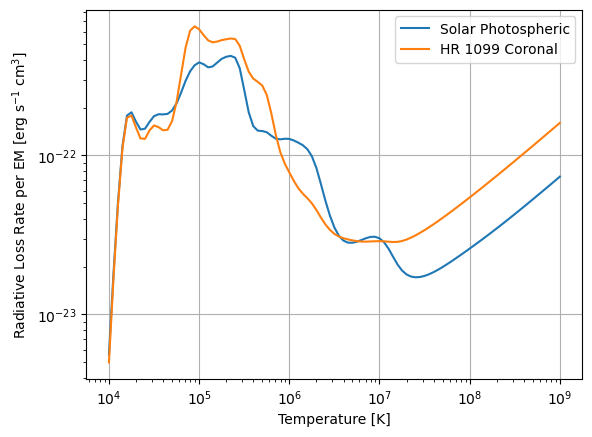

In [112]:
plt.plot(temperature, rl, label='Solar Photospheric')
plt.plot(temperature, rl_hr1099, label='HR 1099 Coronal')
plt.grid('-')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Temperature [K]')
plt.ylabel(r'Radiative Loss Rate per EM [erg s$^{-1}$ cm$^{3}$]')
plt.savefig('/Users/reep/Desktop/hr1099_loss_rate.png',dpi=200)